In [1]:
import pandas as pd

In [10]:
aL = [1, 2, 3, 4]
bL = [5, 6, 7, 8]
cL = [4, 3, 2, 1]
scoreType = ["과제1","과제2","과제3","기말"]
students = ["양용","용석","석양"]
# abc = pd.DataFrame((aL, bL, cL))
abc = pd.DataFrame((aL, bL, cL),
columns=scoreType, index=students)
abc

,과제1,과제2,과제3,기말
양용,1,2,3,4
용석,5,6,7,8
석양,4,3,2,1


In [14]:
rawData = {"3일" : [3, 5, 10, 2], "4일" : [10, 9, 0, 1], "5일" : [5, 7,6, 3]}
data = pd.DataFrame(rawData)
d_index=["과자", "음료수", "아이스크림", "기타"]
data.index=d_index
data

,3일,4일,5일
과자,3,10,5
음료수,5,9,7
아이스크림,10,0,6
기타,2,1,3


In [18]:
data[0::2]

,3일,4일,5일
과자,3,10,5
아이스크림,10,0,6


In [22]:
data[0:2]

,3일,4일,5일
과자,3,10,5
음료수,5,9,7


In [24]:
data.iloc[0:2]

,3일,4일,5일
과자,3,10,5
음료수,5,9,7


In [25]:
from matplotlib import pyplot as plt

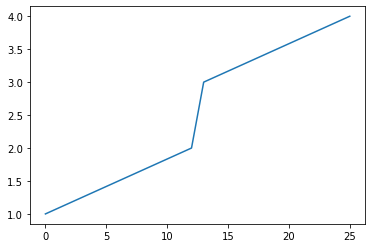

In [28]:
plt.plot([0,12,13,25],[1,2,3,4])
plt.show()

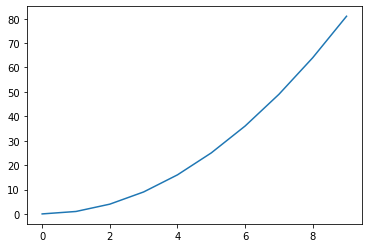

In [30]:
import numpy as np
x =np.arange(10)
y=x**2
plt.plot(x,y)

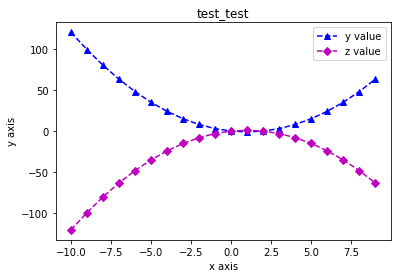

In [51]:
x=np.arange(-10,10)
f_y=x*(x-2)
f_z=-x*(x-2)
plt.plot(x,f_y,"b--^", label="y value")
plt.plot(x,f_z,"m--D",label="z value")
plt.title("test_test")
plt.xlabel("x axis")
plt.ylabel("y axis")
plt.legend()
plt.show()


# 웹크롤링

* HTML

⚫ 간단한 HTML 문서 만들기

⚫ 기본적인 HTML 태그 이해하기

⚫ CSS의 역할 알아보기

⚫ Selector를 이용해 원하는 HTML 요소들만 골라내기

⚫ BeautifulSoup에 selector를 사용해서 요소 추출

# css selecter

### - 아무것도 없으면 : 태그명
### - .(마침표)은 : 클래스명
### - #은 : id
### - 띄어쓰기는 하위단계 고르기 
#### ex/ .서울시  (공백).경영 ->서울시 클래스 중에 하위 경영 클래스 선택
#### ex/ 산기대  (공백).경영 -> 산기대 태그 하위 경영 클래스 선택 
### - 태그명:nth-child(숫자) 
#### ex/ td:nth-child(2) -> td 2번째 아래 자식  

In [2]:
import requests
raw = requests.get("http://147.46.178.16:33333/table.html",
headers={'User-Agent': 'Mozilla/5.0'})
print(raw.text)

<table border=“1“>
  <tr>
    <th class="exampleClass1">요일</th>
    <th>PM10</th>
  </tr>
  <tr>
    <td>월</td>
    <td>100</td>
  </tr>
  <tr>
    <td>화</td>
    <td>80</td>
  </tr>
  <tr>
    <td>수</td>
    <td>180</td>
  </tr>
  <tr>
    <td>목</td>
    <td class="exampleClass1">280</td>
  </tr>
  <tr>
    <td id="exampleID1">금</td>
    <td>50</td>
  </tr>
</table>



<style>
.exampleClass1 {
	color: blue;
	background-color: yellow;
}

#exampleID1 {
	color: red;
	background-color: blue;
	font-family: Verdana;
}
</style>


In [6]:
from bs4 import BeautifulSoup
html = BeautifulSoup(raw.content, "html.parser", from_encoding="utf-8")
#print(html)

test=html.select_one("tr th")# tr th에 해당하는 첫번째 값만 선택
print(test.text)# 클래스의 내용 
print(test.get("class"))#클래스의 속성값

요일
['exampleClass1']


In [10]:
selectfunction= html.select("tr th")
print(selectfunction[0].text)
print(selectfunction[1].text)
for d in selectfunction:
    print(d.text)

요일
PM10
요일
PM10


# 산업일보 실습

In [15]:
import requests
raw = requests.get("http://www.kpu.ac.kr/contents/main/cor/kcollege.html",
headers={'User-Agent': 'Mozilla/5.0'})
#print(raw.text)

from bs4 import BeautifulSoup
html = BeautifulSoup(raw.content, "html.parser", from_encoding="utf-8")
#print(html)


body=html.select(".label.ko")# tr th에 해당하는 첫번째 값만 선택
for b in body:
    print(b.text)

기계공학과
기계설계공학과
메카트로닉스공학과
전자공학부
컴퓨터공학부
게임공학부
신소재공학과
생명화학공학과
디자인학부
경영학부
나노반도체공학과
에너지·전기공학과
지식융합학부


In [16]:
from selenium import webdriver

wd=wevdriver.Chrome

In [6]:
from selenium import webdriver

options=webdriver.ChromeOptions()
options.add_argument('--headless')
options.add_argument('--no-sandbox')
options.add_argument('--disable-dev-shm-usage')

driver_path = "C:/Users/YGB/파이썬/대청캠/data2020/resources/chromedriver"
wd=webdriver.Chrome(executable_path=driver_path)

wd.get("http://147.46.178.16:33333/javascript.html")
#print(wd.page_source) 

wd.find_element_by_css_selector("body a")

<selenium.webdriver.remote.webelement.WebElement (session="965a5df7f65ea9cacfffd2c80e412a3f", element="0d6af3b6-20fe-4e71-b99c-7c6cc3a7ef1d")>

In [8]:
from selenium import webdriver
import time

"""
options=webdriver.ChromeOptions()
options.add_argument('--headless')
options.add_argument('--no-sandbox')
options.add_argument('--disable-dev-shm-usage')
"""

driver_path = "C:/Users/YGB/파이썬/대청캠/data2020/resources/chromedriver"
wd=webdriver.Chrome(executable_path=driver_path)
wd.get("https://blog.naver.com")
time.sleep(2)
boxes=wd.find_elements_by_css_selector("div. info_post")
print(len(boxes))

for i in range(len(boxes)):
        try:
            title=boxes[i].find_element_by_css_selector("a strong").text
            author=boxes[i].find_element_by_css_selector(".name_author").text         
            replies=boxes[i].find_element_by_css_selector(".reply em").text
            thumbnailurl = boxes[i].find_element_by_css_selector("img").get_attribute("bg-image")
            print(replies + "\t" + author + "\t"+ title + "\t" + thumbnailurl)
            
        
        except:
            print("there is an error " + str(i+1) + " 번째 놈 에러")

InvalidSelectorException: Message: invalid selector: An invalid or illegal selector was specified
  (Session info: chrome=83.0.4103.116)


In [10]:
from selenium import webdriver
options = webdriver.ChromeOptions()
options.add_argument('--headless')
options.add_argument('--no-sandbox')
options.add_argument('--disable-dev-shm-usage')
# open it, go to a website, and get results

driver_path = "C:/Users/YGB/파이썬/대청캠/data2020/resources/chromedriver"
wd=webdriver.Chrome(executable_path=driver_path)

wd.get("http://kidd.co.kr")
time.sleep(1)
textarea = wd.find_element_by_css_selector("#form_find")
textarea.send_keys("코로나")
button = wd.find_element_by_css_selector("#sch_form input:nth-child(3)").click()